## Books-Market-Intelligence-SQL-Analysis
#### por Erika González

El presente proyecto tiene como finalidad analizar la base de datos de un servicio digital dedicado a la lectura, en un contexto donde la pandemia impulsó el consumo de contenidos en formato electrónico y aumentó el interés por aplicaciones especializadas para lectores. La base de datos contiene información sobre libros, autores, editoriales, calificaciones y reseñas de usuarios.
A través del uso de consultas SQL, se busca comprender la estructura y comportamiento del catálogo, así como los patrones de interacción de los usuarios dentro de la plataforma. Este análisis permitirá extraer insights clave que servirán como base para desarrollar una propuesta de valor sólida para una nueva solución digital orientada a lectores.

El objetivo principal del proyecto es realizar un análisis exhaustivo del catálogo editorial y del comportamiento de los usuarios mediante consultas SQL, con el fin de:
- Comprender la composición del catálogo, identificando tendencias de publicación y características relevantes de los libros registrados.
- Evaluar el desempeño y popularidad de los libros, a través de métricas como número de reseñas y calificaciones promedio.
- Identificar editoriales y autores clave, basándose en volumen de publicaciones, extensión de los libros y recepción por parte de los usuarios.
- Analizar el comportamiento de los usuarios más activos, para determinar patrones de interacción que pueden influir en el engagement y en la generación de contenido.
- Proporcionar información estratégica que permita fortalecer la propuesta de valor de una aplicación para lectores, mediante decisiones informadas basadas en datos.

### ReadMe:

https://drive.google.com/file/d/1_BnNJriMRDvx7GUSpkwlqwMjZOzYw_Co/view?usp=sharing

### Conectarse a la base de datos

In [3]:
import pandas as pd
from sqlalchemy import create_engine

db_config = {
    'user': 'practicum_student',  # username
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7',  # password
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com',  # ojo: sin espacios
    'port': 5432,  # connection port
    'db': 'data-analyst-final-project-db'  # name of the database
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

engine = create_engine(connection_string, connect_args={'sslmode': 'require'})


In [4]:
pd.io.sql.read_sql("SELECT 1;", con=engine)

,?column?
0,1


In [5]:
# Ver primeras filas de books
pd.io.sql.read_sql("SELECT * FROM books LIMIT 5;", con=engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [6]:
# Ver primeras filas de authors
pd.io.sql.read_sql("SELECT * FROM authors LIMIT 5;", con=engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
# Ver primeras filas de publishers
pd.io.sql.read_sql("SELECT * FROM publishers LIMIT 5;", con=engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
# Ver primeras filas de ratings
pd.io.sql.read_sql("SELECT * FROM ratings LIMIT 5;", con=engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [9]:
# Ver primeras filas de reviews
pd.io.sql.read_sql("SELECT * FROM reviews LIMIT 5;", con=engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


### 1. Encuentra el número de libros publicados después del 1 de enero de 2000.

In [10]:
# Número de libros publicados después del 1 de enero de 2000.

query_1 = """
SELECT 
    COUNT(*) AS books_after_2000
FROM books
WHERE publication_date > '2000-01-01';
"""

result_1 = pd.io.sql.read_sql(query_1, con=engine)
result_1

,books_after_2000
0,819


La base de datos contiene 819 libros publicados después del 1 de enero del año 2000.
Este volumen de publicaciones recientes indica que el catálogo del servicio incluye una oferta amplia de libros modernos, lo cual es relevante para usuarios que buscan literatura actualizada o alineada con tendencias contemporáneas.

### 2. Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.

In [11]:
# Número de reseñas de usuario y la calificación promedio de cada libro
query_2 = """
SELECT
    b.book_id,
    b.title,
    COUNT(DISTINCT rv.review_id) AS review_count,
    AVG(rt.rating) AS avg_rating
FROM books AS b
LEFT JOIN ratings AS rt ON b.book_id = rt.book_id
LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
GROUP BY b.book_id, b.title
ORDER BY avg_rating DESC NULLS LAST;
"""

result_2 = pd.io.sql.read_sql(query_2, con=engine)
result_2

,book_id,title,review_count,avg_rating
0,86,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
1,901,The Walking Dead Book One (The Walking Dead #...,2,5.00
2,390,Light in August,2,5.00
3,972,Wherever You Go There You Are: Mindfulness Me...,2,5.00
4,136,Captivating: Unveiling the Mystery of a Woman'...,2,5.00
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,3,2.25
996,316,His Excellency: George Washington,2,2.00
997,202,Drowning Ruth,3,2.00
998,371,Junky,2,2.00


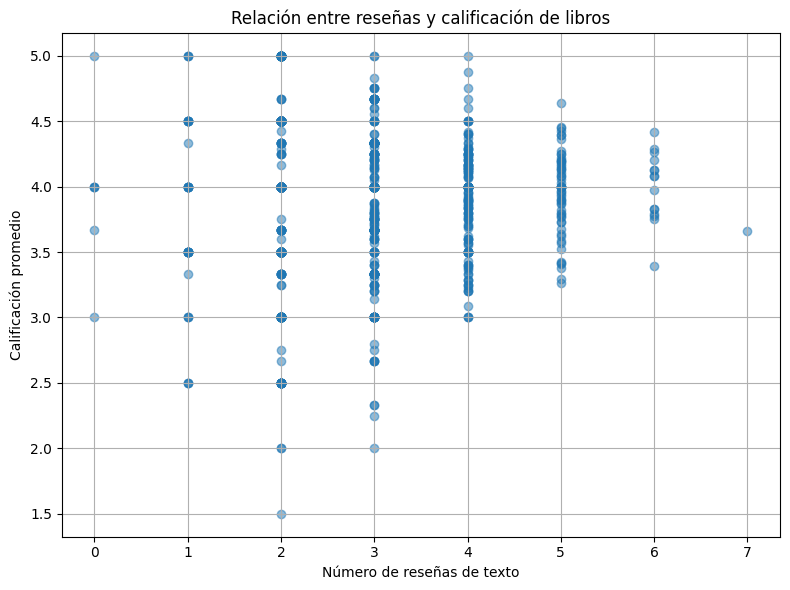

In [12]:
import matplotlib.pyplot as plt

# Asegúrate de que result_2 ya exista con las columnas:
# ['book_id', 'title', 'review_count', 'avg_rating']

plt.figure(figsize=(8, 6))

plt.scatter(
    result_2['review_count'],
    result_2['avg_rating'],
    alpha=0.5
)

plt.xlabel('Número de reseñas de texto')
plt.ylabel('Calificación promedio')
plt.title('Relación entre reseñas y calificación de libros')
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico evidencia que la plataforma depende fuertemente de las calificaciones numéricas, ya que el número de reseñas de texto es muy bajo para la mayoría de los libros. En términos de negocio, esto resalta la oportunidad de incentivar a los usuarios a escribir reseñas para enriquecer el contenido generado por la comunidad y aumentar la confiabilidad de las valoraciones.

### 3. Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas

In [13]:
# Editorial que ha publicado el mayor número de libros (+ de 50 páginas)
query_3 = """
SELECT
    p.publisher_id,
    p.publisher,
    COUNT(b.book_id) AS num_books_over_50_pages
FROM books AS b
JOIN publishers AS p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id, p.publisher
ORDER BY num_books_over_50_pages DESC
LIMIT 1;
"""

result_3 = pd.io.sql.read_sql(query_3, con=engine)
result_3


,publisher_id,publisher,num_books_over_50_pages
0,212,Penguin Books,42


La editorial Penguin Books es la que más publicaciones posee dentro del catálogo cuando se filtran solo los libros con más de 50 páginas, alcanzando un total de 42 títulos.
Esto la posiciona como una editorial destacada en la producción de libros de mayor extensión, lo cual es relevante para análisis de catálogo que buscan excluir folletos, guías breves u obras muy cortas.

### 4. Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.

In [14]:
# Autor con mayor promedio de calificación
query_4 = """
WITH book_stats AS (
    SELECT
        b.book_id,
        b.author_id,
        AVG(r.rating) AS avg_book_rating,
        COUNT(r.rating_id) AS rating_count
    FROM books AS b
    JOIN ratings AS r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.author_id
    HAVING COUNT(r.rating_id) >= 50
)
SELECT
    a.author_id,
    a.author,
    AVG(bs.avg_book_rating) AS avg_author_rating
FROM book_stats AS bs
JOIN authors AS a ON bs.author_id = a.author_id
GROUP BY a.author_id, a.author
ORDER BY avg_author_rating DESC
LIMIT 1;
"""

result_4 = pd.io.sql.read_sql(query_4, con=engine)
result_4

,author_id,author,avg_author_rating
0,236,J.K. Rowling/Mary GrandPré,4.283844


Después de filtrar únicamente los libros con 50 o más calificaciones, se identificó que J.K. Rowling / Mary GrandPré es el autor con el promedio de calificación más alto, alcanzando aproximadamente 4.28 sobre 5.

### Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

In [15]:
# Número promedio de reseñas de texto entre los usuarios
query_5 = """
WITH user_stats AS (
    SELECT
        username,
        COUNT(DISTINCT book_id) AS rated_books
    FROM ratings
    GROUP BY username
    HAVING COUNT(DISTINCT book_id) > 50
),
user_reviews AS (
    SELECT
        u.username,
        u.rated_books,
        COUNT(DISTINCT rv.review_id) AS review_count
    FROM user_stats AS u
    LEFT JOIN reviews AS rv ON u.username = rv.username
    GROUP BY u.username, u.rated_books
)
SELECT
    AVG(review_count) AS avg_text_reviews_per_user
FROM user_reviews;
"""

result_5 = pd.io.sql.read_sql(query_5, con=engine)
result_5

,avg_text_reviews_per_user
0,24.333333


Estos usuarios no solo califican con frecuencia, sino que además participan de manera significativa creando contenido más rico, como reseñas escritas. Aunque, no escriben una reseña por cada libro calificado, su nivel de compromiso es notablemente superior al del usuario promedio. Estos usuarios constituyen un grupo valioso para la plataforma, pues generan contenido útil para otros lectores y ayudan a aumentar la credibilidad de las calificaciones.

### Conclusión
El análisis realizado sobre la base de datos de un servicio de lectura digital permitió identificar patrones clave en la oferta editorial, la calidad percibida de los libros y el comportamiento de los usuarios. A través de consultas SQL, se exploraron tendencias de publicación, editoriales más relevantes, autores con mejor valoración y hábitos de interacción entre los usuarios más activos. Los resultados muestran que el catálogo contiene una cantidad significativa de libros modernos, que Penguin Books destaca como editorial predominante en contenido de mayor extensión y que autores como J.K. Rowling/Mary GrandPré poseen una excelente recepción entre los lectores. Además, se observó que los usuarios con mayor actividad muestran un alto nivel de compromiso a través de sus reseñas escritas. Este tipo de análisis permite fortalecer la propuesta de valor del servicio, orientando decisiones estratégicas sobre recomendaciones, alianzas editoriales y desarrollo de funciones para mejorar el engagement de la comunidad.

El proyecto consistió en analizar una base de datos compuesta por tablas de libros, autores, editoriales, calificaciones y reseñas, con el objetivo de generar insights que apoyen el desarrollo de una nueva propuesta de valor para un servicio de lectura digital.

1. Se identificó que existen 819 libros publicados después del 1 de enero de 2000, lo cual demuestra que el catálogo posee una presencia significativa de literatura moderna.

2. Se calcularon la cantidad de reseñas de texto y la calificación promedio por libro. Se observó que la mayoría de los títulos poseen pocas reseñas, pero calificaciones concentradas entre 3.0 y 4.5.

3. Se determinó que Penguin Books es la editorial con mayor número de libros con más de 50 páginas, con un total de 42 publicaciones, posicionándose como una editorial clave dentro del catálogo.

4. Entre los libros con al menos 50 calificaciones, el autor con la calificación promedio más alta fue J.K. Rowling/Mary GrandPré, con un promedio de 4.28.

5. Finalmente, se encontró que los usuarios que han calificado más de 50 libros escriben en promedio 24.33 reseñas de texto, mostrando un alto nivel de compromiso.

Este análisis refuerza el valor de comprender el comportamiento general del catálogo y de los usuarios, con el fin de tomar decisiones estratégicas orientadas al crecimiento del producto.


### Imporatar dataset a Tableau:

In [16]:
query_dashboard = """
SELECT
    b.book_id,
    b.title,
    a.author,
    p.publisher,
    b.publication_date,
    EXTRACT(YEAR FROM b.publication_date) AS publication_year,
    b.num_pages,
    COUNT(DISTINCT r.rating_id) AS ratings_count,
    AVG(r.rating) AS avg_rating,
    COUNT(DISTINCT rv.review_id) AS review_count
FROM books AS b
LEFT JOIN authors AS a ON b.author_id = a.author_id
LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
LEFT JOIN ratings AS r ON b.book_id = r.book_id
LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
GROUP BY
    b.book_id,
    b.title,
    a.author,
    p.publisher,
    b.publication_date,
    b.num_pages;
"""

books_dashboard = pd.io.sql.read_sql(query_dashboard, con=engine)
books_dashboard.head()


,book_id,title,author,publisher,publication_date,publication_year,num_pages,ratings_count,avg_rating,review_count
0,1,'Salem's Lot,Stephen King/Jerry N. Uelsmann,Doubleday,2005-11-01,2005.0,594,3,3.666667,2
1,2,1 000 Places to See Before You Die,Patricia Schultz,Workman Publishing Company,2003-05-22,2003.0,992,2,2.500000,1
2,3,13 Little Blue Envelopes (Little Blue Envelope...,Maureen Johnson,HarperCollins Publishers,2010-12-21,2010.0,322,3,4.666667,3
3,4,1491: New Revelations of the Americas Before C...,Charles C. Mann,Vintage,2006-10-10,2006.0,541,2,4.500000,2
4,5,1776,David McCullough,Simon Schuster,2006-07-04,2006.0,386,6,4.000000,4


In [17]:
books_dashboard.to_csv('books_dashboard.csv', index=False)

In [18]:
query_users = """
WITH user_stats AS (
    SELECT
        username,
        COUNT(DISTINCT book_id) AS rated_books
    FROM ratings
    GROUP BY username
    HAVING COUNT(DISTINCT book_id) > 50
),
user_reviews AS (
    SELECT
        u.username,
        u.rated_books,
        COUNT(DISTINCT rv.review_id) AS review_count
    FROM user_stats AS u
    LEFT JOIN reviews AS rv
        ON u.username = rv.username
    GROUP BY u.username, u.rated_books
)
SELECT
    username,
    rated_books,
    review_count
FROM user_reviews;
"""

user_activity = pd.io.sql.read_sql(query_users, con=engine)
user_activity.head()

,username,rated_books,review_count
0,jennifermiller,53,25
1,martinadam,56,27
2,paul88,56,22
3,richard89,55,26
4,sfitzgerald,55,28


In [19]:
user_activity.to_csv("user_activity.csv", index=False)

## Tableau Dashboard:

https://public.tableau.com/views/Proyecto-Books-SQL/Dashboard?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link